<a href="https://colab.research.google.com/github/ARUN-PRASATH-14/ML-PROJECT2/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print("GPU:", tf.config.list_physical_devices('GPU'))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import pandas as pd

base_path = "/content/drive/MyDrive/ML-PROJECT"

image_dir1 = os.path.join(base_path, "HAM10000_images_part_1")
image_dir2 = os.path.join(base_path, "HAM10000_images_part_2")

excel_path = os.path.join(base_path, "meta.xlsx")

df = pd.read_excel(excel_path)

print("Loaded:", df.shape)

Loaded: (10015, 11)


In [7]:
def get_image_path(image_id):
    path1 = os.path.join(image_dir1, image_id + ".jpg")
    path2 = os.path.join(image_dir2, image_id + ".jpg")

    if os.path.exists(path1):
        return path1
    elif os.path.exists(path2):
        return path2
    else:
        return None

df['path'] = df['image_id'].apply(get_image_path)

# Remove missing images
df = df[df['path'].notnull()]

print("Usable images:", len(df))

Usable images: 8376


In [8]:
print(df['dx'].value_counts())

dx
nv       5619
bkl      1006
mel       945
bcc       429
akiec     254
vasc      119
df          4
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['dx'],
    random_state=42
)

print("Train:", len(train_df))
print("Validation:", len(val_df))

Train: 6700
Validation: 1676


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='dx',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='dx',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 6700 validated image filenames belonging to 7 classes.
Found 1676 validated image filenames belonging to 7 classes.


In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

num_classes = len(train_generator.class_indices)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
!ls /content/drive/MyDrive/

'15 MARKS.gdoc'
'Annexure-I_251208_202041(1).gdoc'
'bandicam 2025-02-15 20-14-39-446.mp4'
'Certificate '
 Classroom
 cn-less_code_programs
'Cognifyz tasks.rar'
'Colab Notebooks'
'computer forensics.gdoc'
'Copy of 4.python_variables.pdf'
'Copy of Aryan DSA-169 Series.gsheet'
'Copy of Research Automation.gform'
'Copy of Tracker Template.gsheet'
'cv (1).pdf'
'cv (2).pdf'
 cv.pdf
 dataset.gsheet
 Dec-intern
'Document from ~`A⁷𓃵.pdf'
'Document from ~`A𓃵.pdf'
'Ex 10 BFS (1).gdoc'
'Ex 10 BFS.gdoc'
'Ex 11 DFS.gdoc'
'Ex 5 Infix to Postfix.gdoc'
'Ex 9 Priority Queue using Heap.gdoc'
'FlowPy – From Flowchart to Python Instantly_20250808_213349_0000.pdf'
 GDToT
'Google Earth'
'Google Keep Document (1).gdoc'
'Google Keep Document (2).gdoc'
'Google Keep Document (3).gdoc'
'Google Keep Document (4).gdoc'
'Google Keep Document (5).gdoc'
'Google Keep Document (6).gdoc'
'Google Keep Document (7).gdoc'
'Google Keep Document.gdoc'
'IMG-20250720-WA0000 (1).jpg'
 IMG-20250720-WA0000.jpg
 iot-level-3-4.md
'I

In [13]:
!ls /content/drive/MyDrive/ML-PROJECT

HAM10000_images_part_1	HAM10000_images_part_2	meta.xlsx


In [14]:
!cp -r "/content/drive/MyDrive/ML-PROJECT/HAM10000_images_part_1" /content/
!cp -r "/content/drive/MyDrive/ML-PROJECT/HAM10000_images_part_2" /content/

In [15]:
!ls /content/

drive  HAM10000_images_part_1  HAM10000_images_part_2  sample_data


In [16]:
image_dir1 = "/content/HAM10000_images_part_1"
image_dir2 = "/content/HAM10000_images_part_2"

In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 220s 907ms/step - accuracy: 0.6321 - loss: 1.2320 - val_accuracy: 0.6706 - val_loss: 1.1147
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 149s 710ms/step - accuracy: 0.6757 - loss: 1.1087 - val_accuracy: 0.6706 - val_loss: 1.1061
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 151s 718ms/step - accuracy: 0.6860 - loss: 1.0872 - val_accuracy: 0.6706 - val_loss: 1.1006
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 721ms/step - accuracy: 0.6670 - loss: 1.1196 - val_accuracy: 0.6706 - val_loss: 1.1163
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 150s 716ms/step - accuracy: 0.6842 - loss: 1.0872 - val_accuracy: 0.6706 - val_loss: 1.0959


In [18]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['dx']),
    y=train_df['dx']
)

class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(4.714989444053484), 1: np.float64(2.7905039566847147), 2: np.float64(1.188997338065661), 3: np.float64(319.04761904761904), 4: np.float64(1.2660619803476947), 5: np.float64(0.2129350071508025), 6: np.float64(10.075187969924812)}


In [19]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    class_weight=class_weights
)

Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 186s 809ms/step - accuracy: 0.2307 - loss: 2.2665 - val_accuracy: 0.0143 - val_loss: 2.0464
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 170s 810ms/step - accuracy: 0.1102 - loss: 2.0563 - val_accuracy: 0.0304 - val_loss: 2.0650
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 162s 772ms/step - accuracy: 0.1028 - loss: 2.0154 - val_accuracy: 0.0304 - val_loss: 1.9357
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 168s 798ms/step - accuracy: 0.1049 - loss: 1.9976 - val_accuracy: 0.0304 - val_loss: 1.7718
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 174s 826ms/step - accuracy: 0.1216 - loss: 2.1747 - val_accuracy: 0.6706 - val_loss: 1.7273


In [19]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    class_weight=class_weights
)

In [20]:
def get_image_path(image_id):
    path1 = os.path.join(image_dir1, image_id + ".jpg")
    path2 = os.path.join(image_dir2, image_id + ".jpg")
    return path1 if os.path.exists(path1) else path2

df['path'] = df['image_id'].apply(get_image_path)
df = df[df['path'].notnull()]

print("Total usable images:", len(df))

Total usable images: 8376


In [21]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['dx'],
    random_state=42
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='dx',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='dx',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 6700 validated image filenames belonging to 7 classes.
Found 1676 validated image filenames belonging to 7 classes.


In [23]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 138s 658ms/step - accuracy: 0.6318 - loss: 1.2266 - val_accuracy: 0.6706 - val_loss: 1.1001
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 125s 596ms/step - accuracy: 0.6690 - loss: 1.1180 - val_accuracy: 0.6706 - val_loss: 1.1025
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 122s 581ms/step - accuracy: 0.6609 - loss: 1.1370 - val_accuracy: 0.6706 - val_loss: 1.1061
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 123s 586ms/step - accuracy: 0.6762 - loss: 1.0900 - val_accuracy: 0.6706 - val_loss: 1.0936
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 125s 597ms/step - accuracy: 0.6762 - loss: 1.1052 - val_accuracy: 0.6706 - val_loss: 1.0980


In [24]:
df['binary_label'] = df['dx'].apply(
    lambda x: 1 if x in ['mel', 'bcc', 'akiec'] else 0
)

print(df['binary_label'].value_counts())

binary_label
0    6748
1    1628
Name: count, dtype: int64


In [27]:
df['binary_label'] = df['binary_label'].astype(str)

In [28]:
print(df['binary_label'].unique())

['0' '1']


In [29]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['binary_label'],
    random_state=42
)

In [30]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 6700 validated image filenames belonging to 2 classes.
Found 1676 validated image filenames belonging to 2 classes.


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',   # 🔥 important
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 6700 validated image filenames belonging to 2 classes.
Found 1676 validated image filenames belonging to 2 classes.


In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # 🔥 binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',   # 🔥 binary loss
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 163s 679ms/step - accuracy: 0.7922 - loss: 0.5227 - val_accuracy: 0.8055 - val_loss: 0.4928
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 123s 587ms/step - accuracy: 0.7990 - loss: 0.5121 - val_accuracy: 0.8055 - val_loss: 0.4927
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - accuracy: 0.8053 - loss: 0.4987 - val_accuracy: 0.8055 - val_loss: 0.4931
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 138s 659ms/step - accuracy: 0.8065 - loss: 0.4980 - val_accuracy: 0.8055 - val_loss: 0.4927
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 133s 635ms/step - accuracy: 0.8077 - loss: 0.4947 - val_accuracy: 0.8055 - val_loss: 0.4928


In [34]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 284s 928ms/step - accuracy: 0.3465 - loss: 0.9129 - val_accuracy: 0.2470 - val_loss: 2.4744
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 138s 658ms/step - accuracy: 0.7645 - loss: 0.5326 - val_accuracy: 0.6969 - val_loss: 0.6882
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 672ms/step - accuracy: 0.8194 - loss: 0.4197 - val_accuracy: 0.8055 - val_loss: 0.5158
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 670ms/step - accuracy: 0.8266 - loss: 0.3880 - val_accuracy: 0.8055 - val_loss: 0.5045
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 143s 679ms/step - accuracy: 0.8425 - loss: 0.3590 - val_accuracy: 0.8061 - val_loss: 0.4464


In [35]:
print(train_generator.class_indices)

{'0': 0, '1': 1}


In [36]:
import numpy as np

val_generator.reset()
pred_probs = model.predict(val_generator)
preds = (pred_probs > 0.5).astype(int)

true_labels = val_generator.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 359ms/step


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels, preds)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(true_labels, preds))

Confusion Matrix:
 [[1349    1]
 [ 326    0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1350
           1       0.00      0.00      0.00       326

    accuracy                           0.80      1676
   macro avg       0.40      0.50      0.45      1676
weighted avg       0.65      0.80      0.72      1676



In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(true_labels, pred_probs)
print("AUC Score:", auc)

AUC Score: 0.49104294478527605


In [39]:
val_generator.reset()
pred_probs = model.predict(val_generator)

# Try lower threshold
preds = (pred_probs > 0.3).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(val_generator.classes, preds))
print("\nClassification Report:\n")
print(classification_report(val_generator.classes, preds))

print("AUC Score:", roc_auc_score(val_generator.classes, pred_probs))

53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step
Confusion Matrix:
 [[1265   85]
 [ 310   16]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1350
           1       0.16      0.05      0.07       326

    accuracy                           0.76      1676
   macro avg       0.48      0.49      0.47      1676
weighted avg       0.68      0.76      0.71      1676

AUC Score: 0.5239059304703477


In [41]:
df['binary_label'] = df['dx'].apply(
    lambda x: 1 if x in ['mel','bcc','akiec'] else 0
)

df['binary_label'] = df['binary_label'].astype(str)

In [42]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['binary_label'],
    random_state=42
)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='binary_label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 6700 validated image filenames belonging to 2 classes.
Found 1676 validated image filenames belonging to 2 classes.


In [44]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze most layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [45]:
def focal_loss(gamma=2., alpha=0.75):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        return alpha * tf.pow((1 - p_t), gamma) * bce
    return loss

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=focal_loss(),
    metrics=['accuracy']
)

In [47]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=focal_loss(),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 196s 789ms/step - accuracy: 0.5412 - loss: 0.2191 - val_accuracy: 0.8055 - val_loss: 0.0711
Epoch 2/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 146s 696ms/step - accuracy: 0.6715 - loss: 0.1277 - val_accuracy: 0.8055 - val_loss: 0.0641
Epoch 3/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 136s 650ms/step - accuracy: 0.7312 - loss: 0.1061 - val_accuracy: 0.8055 - val_loss: 0.0604
Epoch 4/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 135s 644ms/step - accuracy: 0.7653 - loss: 0.0898 - val_accuracy: 0.8055 - val_loss: 0.0634
Epoch 5/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 135s 645ms/step - accuracy: 0.7706 - loss: 0.0911 - val_accuracy: 0.8055 - val_loss: 0.0616
Epoch 6/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 137s 653ms/step - accuracy: 0.7793 - loss: 0.0890 - val_accuracy: 0.8055 - val_loss: 0.0624
Epoch 7/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 136s 648ms/step - accuracy: 0.7864 - loss: 0.0849 - val_accuracy: 0.8055 - val_loss: 0.0632
Epoch 8/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 146s 694ms/step - accuracy: 0.7895 - loss: 0

In [49]:
val_generator.reset()
pred_probs = model.predict(val_generator)
preds = (pred_probs > 0.4).astype(int)   # Slightly lower threshold

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(val_generator.classes, preds))
print(classification_report(val_generator.classes, preds))
print("AUC:", roc_auc_score(val_generator.classes, pred_probs))

53/53 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step
[[1350    0]
 [ 326    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1350
           1       0.00      0.00      0.00       326

    accuracy                           0.81      1676
   macro avg       0.40      0.50      0.45      1676
weighted avg       0.65      0.81      0.72      1676

AUC: 0.46981367870938423


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from google.colab import files
uploaded = files.upload()

Saving HAM_0000025.jpg to HAM_0000025.jpg


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

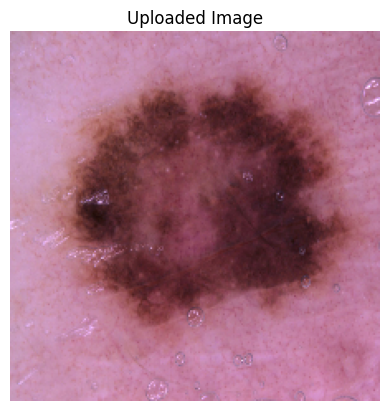

In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.title("Uploaded Image")
plt.axis("off")

In [52]:
prediction = model.predict(img_array)[0][0]

print("Cancer Probability:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Cancer Probability: 0.17797007


In [53]:
if prediction > 0.4:   # slightly lower threshold
    print("⚠️ Model Prediction: CANCER")
else:
    print("✅ Model Prediction: NON-CANCER")

✅ Model Prediction: NON-CANCER


In [54]:
print(prediction)

0.17797007


In [55]:
model.save("skin_cancer_model.h5")

In [57]:
from google.colab import files
files.download("skin_cancer_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>